In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from scripts.mdvr_extraction import acoustic_features, mfcc_features, f

# Data Prep

In [3]:
df_all_features = pd.merge(acoustic_features(), mfcc_features(), how="left", on="voiceID")
f.convert_to_csv(df_all_features, "../data/processed/MDVR_all_features_chunks")
print(df_all_features)

../data/raw/MDVR-KCL/MDVR/HC/ID10/*.wav
Entering extract_features_from_folder, time: 2024-10-19 17:08:19.714938
../data/raw/MDVR-KCL/MDVR/HC/ID23/*.wav
Entering extract_features_from_folder, time: 2024-10-19 17:08:21.257747
../data/raw/MDVR-KCL/MDVR/HC/ID36/*.wav
Entering extract_features_from_folder, time: 2024-10-19 17:08:22.349792
../data/raw/MDVR-KCL/MDVR/HC/ID11/*.wav
Entering extract_features_from_folder, time: 2024-10-19 17:08:23.701501
../data/raw/MDVR-KCL/MDVR/HC/ID19/*.wav
Entering extract_features_from_folder, time: 2024-10-19 17:08:23.732987
../data/raw/MDVR-KCL/MDVR/HC/ID14/*.wav
Entering extract_features_from_folder, time: 2024-10-19 17:08:25.265851
../data/raw/MDVR-KCL/MDVR/HC/ID03/*.wav
Entering extract_features_from_folder, time: 2024-10-19 17:08:25.455864
../data/raw/MDVR-KCL/MDVR/HC/ID08/*.wav
Entering extract_features_from_folder, time: 2024-10-19 17:08:26.131498
../data/raw/MDVR-KCL/MDVR/HC/ID28/*.wav
Entering extract_features_from_folder, time: 2024-10-19 17:08:26

In [4]:
df = pd.read_csv("../data/processed/MDVR_all_features_chunks.csv")

df.drop(['voiceID', 'label_x'], inplace = True, axis = 1)
df.rename(columns={'label_y':'label'}, inplace=True)

df['label'].value_counts()
df.head()

,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,localShimmer,localdbShimmer,apq3Shimmer,...,mfcc_feature4,mfcc_feature5,mfcc_feature6,mfcc_feature7,mfcc_feature8,mfcc_feature9,mfcc_feature10,mfcc_feature11,mfcc_feature12,label
0,188.854552,19.970524,11.343474,0.030147,0.000161,0.014043,0.013662,0.084065,0.963829,0.029210,...,64.334963,15.345019,-31.597330,-1.829923,-45.755232,-12.215464,7.181481,-29.826280,-18.597960,0
1,214.328825,19.899868,20.692339,0.011554,0.000054,0.004059,0.005153,0.057793,0.538113,0.019818,...,38.502097,3.972590,-38.672805,14.113330,-14.439182,-22.478019,-26.476434,-45.932806,-15.171863,0
2,217.631524,49.558034,12.884778,0.026392,0.000122,0.014579,0.011823,0.085138,0.873539,0.032275,...,9.370362,-14.193565,-23.956431,18.681203,-34.204832,-4.171476,3.710432,-37.671655,-14.202728,0
3,198.375534,31.013390,10.707738,0.028616,0.000145,0.011992,0.012530,0.102843,1.019116,0.043489,...,42.519807,16.070086,-34.046919,-2.364804,-30.208685,-5.093004,-0.033051,-23.719442,-19.915062,0
4,226.450122,34.363458,11.256514,0.018730,0.000082,0.007895,0.007915,0.079017,0.753360,0.028437,...,-4.329023,4.724259,-25.660703,8.949377,-27.735232,-10.252121,-5.337177,-21.582630,-27.041187,0


In [5]:
len(df)
df.columns

Index(['meanF0Hz', 'stdevF0Hz', 'HNR', 'localJitter', 'localabsoluteJitter',
       'rapJitter', 'ppq5Jitter', 'localShimmer', 'localdbShimmer',
       'apq3Shimmer', 'apq5Shimmer', 'mfcc_feature0', 'mfcc_feature1',
       'mfcc_feature2', 'mfcc_feature3', 'mfcc_feature4', 'mfcc_feature5',
       'mfcc_feature6', 'mfcc_feature7', 'mfcc_feature8', 'mfcc_feature9',
       'mfcc_feature10', 'mfcc_feature11', 'mfcc_feature12', 'label'],
      dtype='object')

In [6]:
df = df.dropna()
len(df)
df

,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,localShimmer,localdbShimmer,apq3Shimmer,...,mfcc_feature4,mfcc_feature5,mfcc_feature6,mfcc_feature7,mfcc_feature8,mfcc_feature9,mfcc_feature10,mfcc_feature11,mfcc_feature12,label
0,188.854552,19.970524,11.343474,0.030147,0.000161,0.014043,0.013662,0.084065,0.963829,0.029210,...,64.334963,15.345019,-31.597330,-1.829923,-45.755232,-12.215464,7.181481,-29.826280,-18.597960,0
1,214.328825,19.899868,20.692339,0.011554,0.000054,0.004059,0.005153,0.057793,0.538113,0.019818,...,38.502097,3.972590,-38.672805,14.113330,-14.439182,-22.478019,-26.476434,-45.932806,-15.171863,0
2,217.631524,49.558034,12.884778,0.026392,0.000122,0.014579,0.011823,0.085138,0.873539,0.032275,...,9.370362,-14.193565,-23.956431,18.681203,-34.204832,-4.171476,3.710432,-37.671655,-14.202728,0
3,198.375534,31.013390,10.707738,0.028616,0.000145,0.011992,0.012530,0.102843,1.019116,0.043489,...,42.519807,16.070086,-34.046919,-2.364804,-30.208685,-5.093004,-0.033051,-23.719442,-19.915062,0
4,226.450122,34.363458,11.256514,0.018730,0.000082,0.007895,0.007915,0.079017,0.753360,0.028437,...,-4.329023,4.724259,-25.660703,8.949377,-27.735232,-10.252121,-5.337177,-21.582630,-27.041187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,132.059876,5.120039,18.034223,0.020386,0.000155,0.009454,0.008585,0.062269,0.644633,0.018966,...,33.437832,7.285012,-8.542293,4.422076,1.882864,-21.122573,-49.139254,2.060144,2.407443,1
812,159.752483,7.504020,11.492616,0.007768,0.000048,0.001707,0.002810,0.062120,0.545096,0.017635,...,14.449417,-38.146160,-79.518855,17.959758,41.254586,1.935457,-37.342516,4.009900,9.515182,1
813,133.657639,5.708039,11.834952,0.019672,0.000147,0.008323,0.006846,0.129748,1.322141,0.046390,...,24.668902,-74.993281,-92.681605,5.812118,52.534712,8.305869,-36.771666,22.359389,-0.644136,1
814,133.135313,14.649480,13.451469,0.016941,0.000127,0.005838,0.008407,0.092569,0.899016,0.039763,...,33.361054,-41.751928,-50.604288,16.480130,45.274052,13.761140,-50.881052,-5.098059,25.433819,1


# EDA

<Figure size 3000x3000 with 0 Axes>

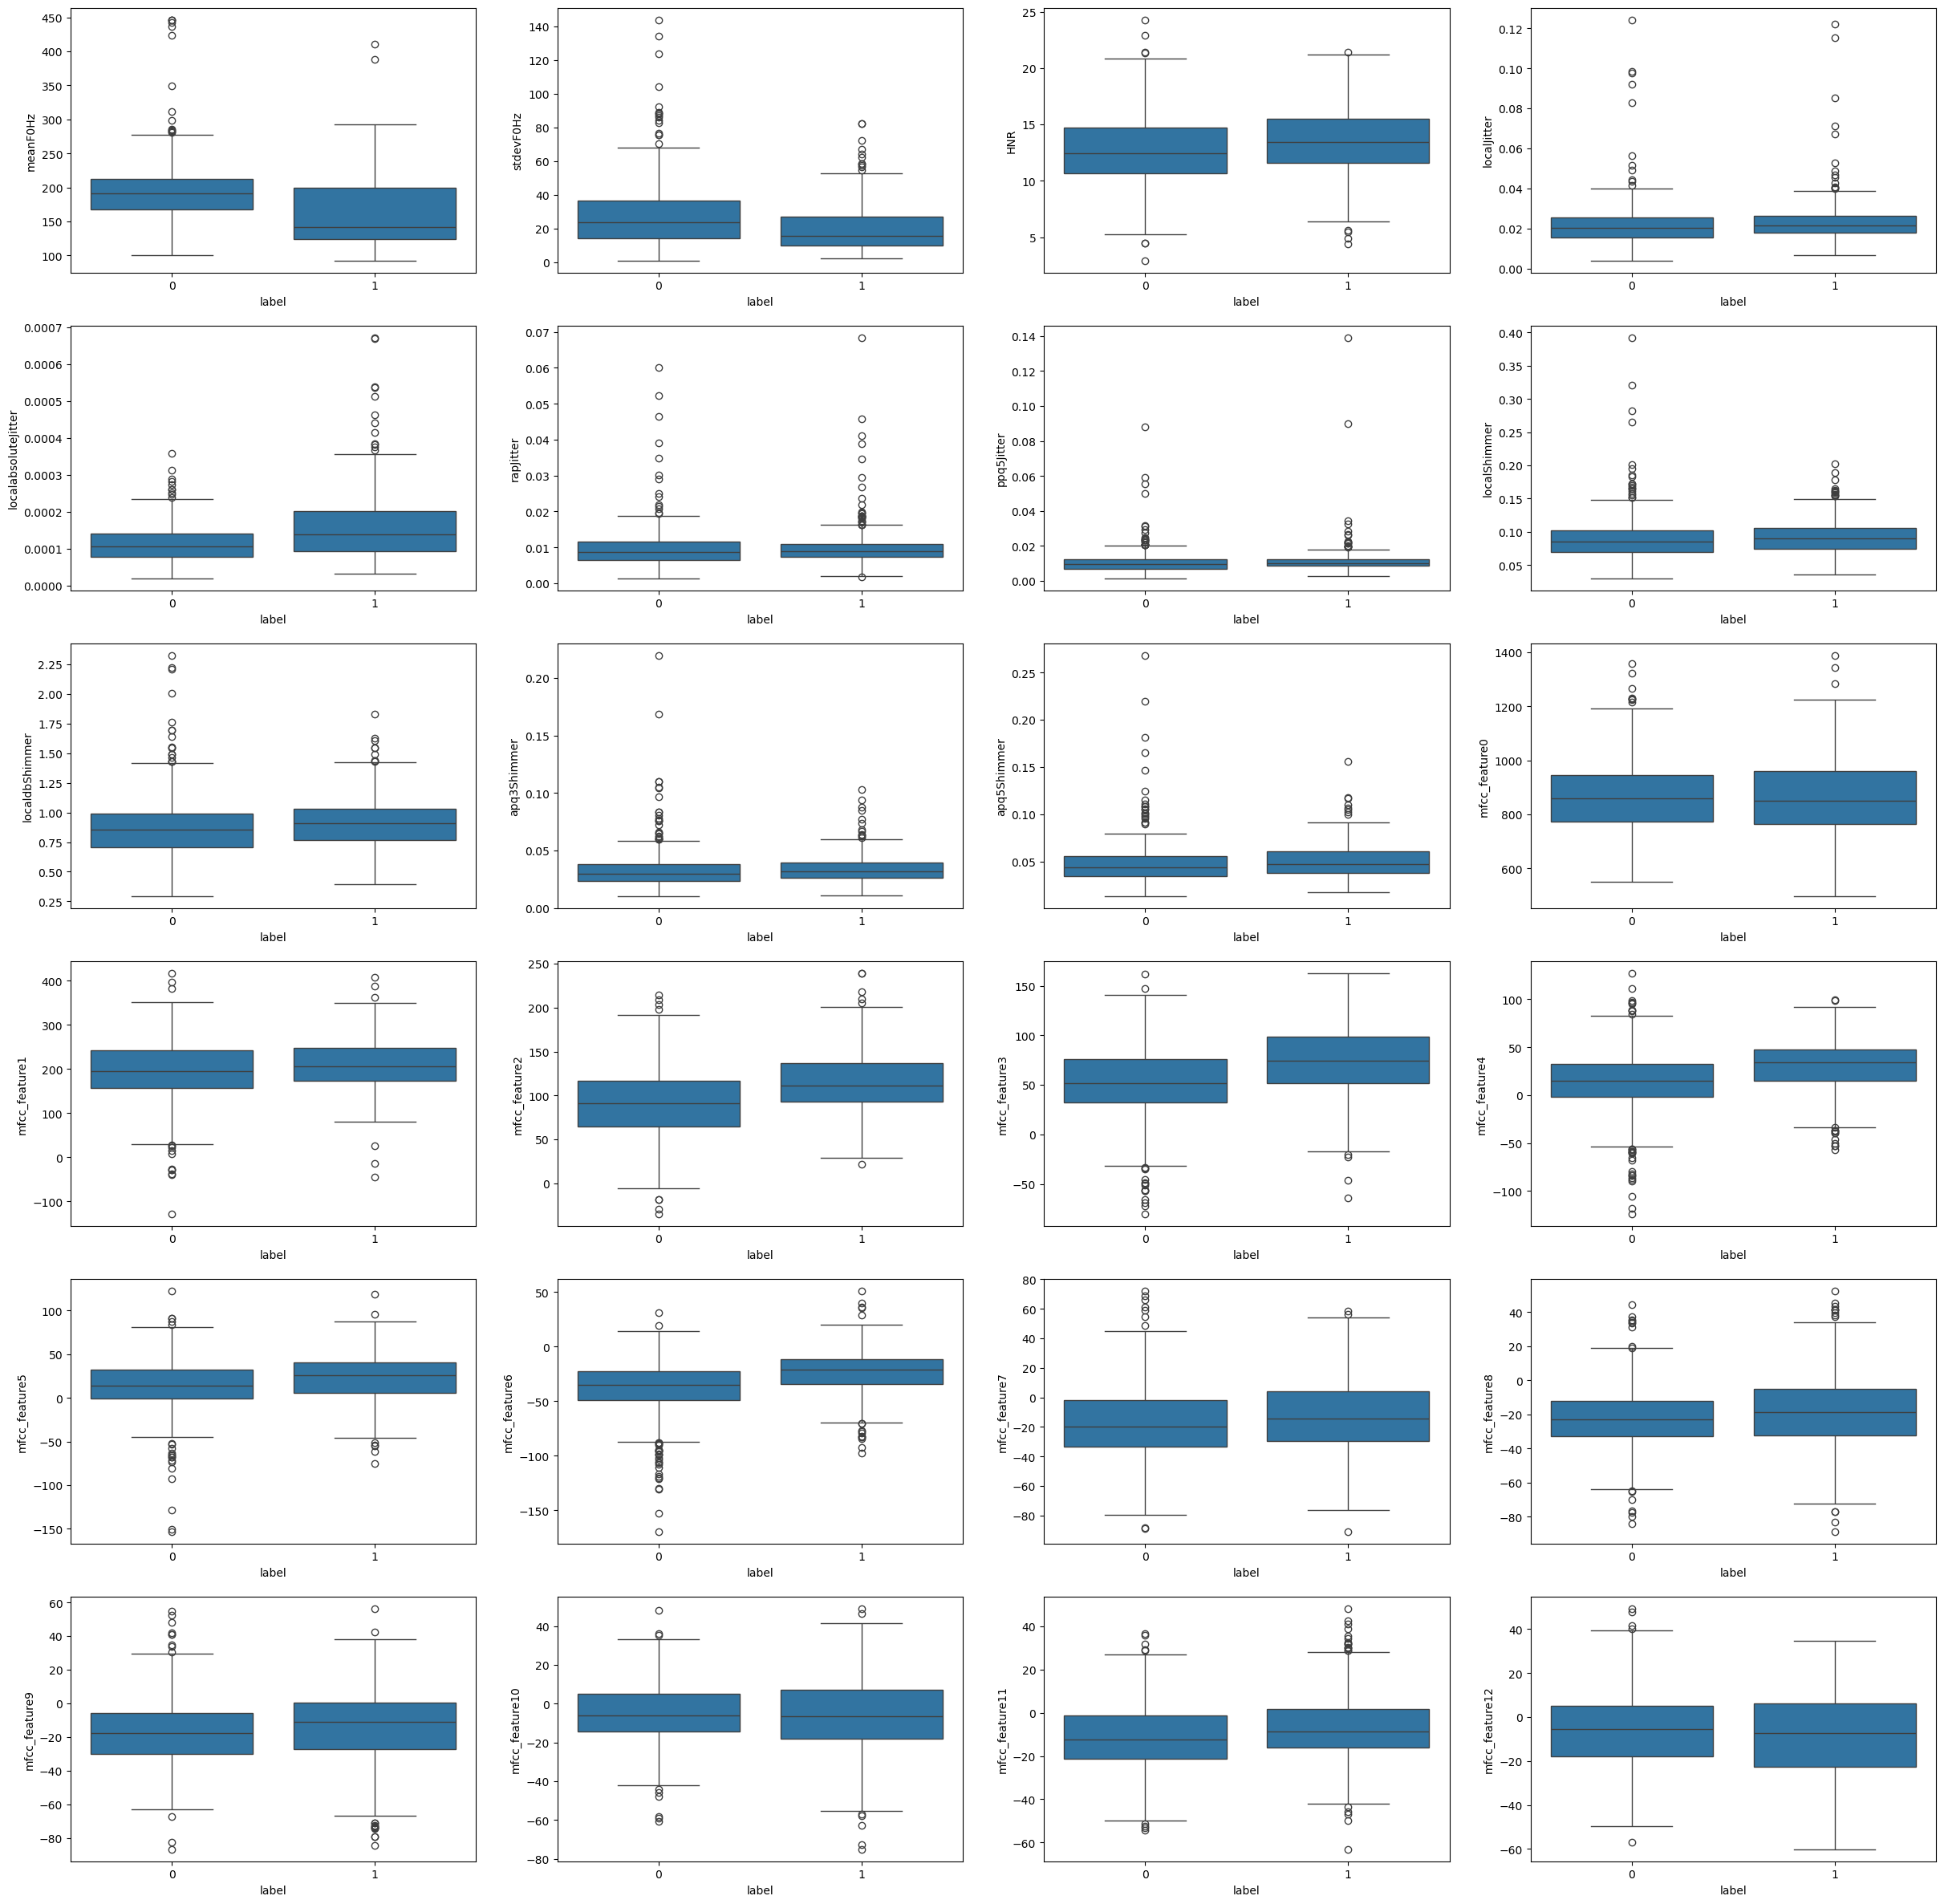

In [7]:
plt.figure(figsize=(30,30))

cols = df.columns.drop('label')
fig, ax = plt.subplots(6,4, figsize=(30,30))
for i,t in enumerate(cols):
    sns.boxplot(y=t, x= "label", data=df, ax=ax[i//4,i % 4])
plt.show()

In [8]:
df['label'].value_counts(normalize=True)

label
0    0.580446
1    0.419554
Name: proportion, dtype: float64

In [9]:
df['label'].mean()

0.41955445544554454

In [10]:
df.nunique()

meanF0Hz               808
stdevF0Hz              808
HNR                    808
localJitter            808
localabsoluteJitter    808
rapJitter              808
ppq5Jitter             808
localShimmer           808
localdbShimmer         808
apq3Shimmer            808
apq5Shimmer            808
mfcc_feature0          808
mfcc_feature1          808
mfcc_feature2          808
mfcc_feature3          808
mfcc_feature4          808
mfcc_feature5          808
mfcc_feature6          808
mfcc_feature7          808
mfcc_feature8          808
mfcc_feature9          808
mfcc_feature10         808
mfcc_feature11         808
mfcc_feature12         808
label                    2
dtype: int64

# Validation Framework

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.iloc[:, :-1]
df_X = df.iloc[:, :-1]
df_Y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.3, random_state = 0)
X

,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,localShimmer,localdbShimmer,apq3Shimmer,...,mfcc_feature3,mfcc_feature4,mfcc_feature5,mfcc_feature6,mfcc_feature7,mfcc_feature8,mfcc_feature9,mfcc_feature10,mfcc_feature11,mfcc_feature12
0,188.854552,19.970524,11.343474,0.030147,0.000161,0.014043,0.013662,0.084065,0.963829,0.029210,...,63.167843,64.334963,15.345019,-31.597330,-1.829923,-45.755232,-12.215464,7.181481,-29.826280,-18.597960
1,214.328825,19.899868,20.692339,0.011554,0.000054,0.004059,0.005153,0.057793,0.538113,0.019818,...,82.323787,38.502097,3.972590,-38.672805,14.113330,-14.439182,-22.478019,-26.476434,-45.932806,-15.171863
2,217.631524,49.558034,12.884778,0.026392,0.000122,0.014579,0.011823,0.085138,0.873539,0.032275,...,60.858418,9.370362,-14.193565,-23.956431,18.681203,-34.204832,-4.171476,3.710432,-37.671655,-14.202728
3,198.375534,31.013390,10.707738,0.028616,0.000145,0.011992,0.012530,0.102843,1.019116,0.043489,...,47.264931,42.519807,16.070086,-34.046919,-2.364804,-30.208685,-5.093004,-0.033051,-23.719442,-19.915062
4,226.450122,34.363458,11.256514,0.018730,0.000082,0.007895,0.007915,0.079017,0.753360,0.028437,...,42.731295,-4.329023,4.724259,-25.660703,8.949377,-27.735232,-10.252121,-5.337177,-21.582630,-27.041187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,132.059876,5.120039,18.034223,0.020386,0.000155,0.009454,0.008585,0.062269,0.644633,0.018966,...,61.629714,33.437832,7.285012,-8.542293,4.422076,1.882864,-21.122573,-49.139254,2.060144,2.407443
812,159.752483,7.504020,11.492616,0.007768,0.000048,0.001707,0.002810,0.062120,0.545096,0.017635,...,43.041712,14.449417,-38.146160,-79.518855,17.959758,41.254586,1.935457,-37.342516,4.009900,9.515182
813,133.657639,5.708039,11.834952,0.019672,0.000147,0.008323,0.006846,0.129748,1.322141,0.046390,...,124.688651,24.668902,-74.993281,-92.681605,5.812118,52.534712,8.305869,-36.771666,22.359389,-0.644136
814,133.135313,14.649480,13.451469,0.016941,0.000127,0.005838,0.008407,0.092569,0.899016,0.039763,...,122.833420,33.361054,-41.751928,-50.604288,16.480130,45.274052,13.761140,-50.881052,-5.098059,25.433819


# Feature Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.310980,0.346310,0.502185,0.151756,0.136522,0.128451,0.113259,0.294936,0.478132,0.254870,...,0.804129,0.471307,0.330165,0.472103,0.616080,0.667079,0.538261,0.316131,0.334954,0.464345
1,0.126369,0.189826,0.488974,0.134286,0.193787,0.088885,0.068222,0.143107,0.225650,0.095333,...,0.499343,0.523518,0.819070,0.635035,0.248337,0.488596,0.522054,0.491066,0.484589,0.425421
2,0.271026,0.119947,0.278621,0.128153,0.126937,0.079981,0.048927,0.216934,0.376046,0.166114,...,0.491305,0.526002,0.714025,0.523447,0.600834,0.525328,0.520897,0.546620,0.493344,0.501359
3,0.318430,0.160553,0.549189,0.135763,0.120254,0.140605,0.105505,0.133227,0.295835,0.099241,...,0.582703,0.486479,0.543230,0.506064,0.396840,0.475685,0.364159,0.477783,0.431342,0.390515
4,0.314364,0.305855,0.337778,0.165366,0.147262,0.108395,0.063760,0.159601,0.294676,0.078751,...,0.510953,0.629622,0.531922,0.552399,0.192567,0.473386,0.474465,0.561659,0.490779,0.326157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,0.104560,0.059461,0.491498,0.149622,0.227089,0.100216,0.077897,0.150832,0.286785,0.115321,...,0.522610,0.565603,0.690791,0.800796,0.319999,0.371298,0.705932,0.600273,0.721290,0.688498
561,0.294888,0.323761,0.548542,0.120046,0.111855,0.109226,0.072934,0.080490,0.169706,0.067771,...,0.586168,0.588527,0.615245,0.603787,0.428813,0.511895,0.564461,0.566486,0.344737,0.466725
562,0.236863,0.061354,0.683064,0.150078,0.161698,0.110090,0.099357,0.226350,0.393074,0.153608,...,0.611360,0.655016,0.506777,0.578287,0.536715,0.359917,0.388794,0.668862,0.411555,0.437016
563,0.115802,0.441552,0.671620,0.171424,0.256938,0.122236,0.098674,0.139838,0.310326,0.128961,...,0.580175,0.659428,0.715989,0.662239,0.719146,0.729563,0.558428,0.445224,0.613802,0.708563


# KNN Model No Tune

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, classification_report, roc_auc_score

In [16]:
model_knn = KNeighborsClassifier(n_neighbors = 10)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_knn = ((conf_matrix_knn[0,0] + conf_matrix_knn[1,1])/(conf_matrix_knn[0,0] +conf_matrix_knn[0,1]+conf_matrix_knn[1,0]+conf_matrix_knn[1,1]))*100


print("Classification Accuracy: ", accuracy_knn)

print(classification_report(y_test, y_pred_knn))

print(roc_auc_score(y_test, y_pred_knn))

print(y_pred_knn)

print(conf_matrix_knn)

Classification Accuracy:  87.65432098765432
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       137
           1       0.96      0.75      0.84       106

    accuracy                           0.88       243
   macro avg       0.90      0.86      0.87       243
weighted avg       0.89      0.88      0.87       243

0.8616926043244733
[1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1
 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0]
[[134   3]
 [ 27  79]]


# Hyperparameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [18]:

leaf_size = list(range(1,50))
n_neighbors = list(range(1,20)) 
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn_2 = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

clf = GridSearchCV(knn_2, hyperparameters, cv=10)

best_model = clf.fit(X_train, y_train)

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model.best_score_)
print('Best Hyperparameters: %s' % best_model.best_params_)
print(hyperparameters)
y_pred_knn_2 = best_model.predict(X_test)

conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_knn_2)

accuracy_knn_2 = ((conf_matrix_knn_2[0,0] + conf_matrix_knn_2[1,1])/(conf_matrix_knn_2[0,0] +conf_matrix_knn_2[0,1]+conf_matrix_knn_2[1,0]+conf_matrix_knn_2[1,1]))*100

print(accuracy_knn_2)

print(classification_report(y_test, y_pred_knn_2))

print(roc_auc_score(y_test, y_pred_knn_2))

print(y_pred_knn_2)
print(y_test)

print(conf_matrix_knn_2)

Best leaf_size: 1
Best p: 2
Best n_neighbors: 4
Best Score: 0.930983709273183
Best Hyperparameters: {'leaf_size': 1, 'n_neighbors': 4, 'p': 2}
{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'p': [1, 2]}
88.88888888888889
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       137
           1       0.94      0.79      0.86       106

    accuracy                           0.89       243
   macro avg       0.90      0.88      0.88       243
weighted avg       0.89      0.89      0.89       243

0.8779782399118579
[1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1
 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 

# KNN Model With Tune

In [19]:
model_knn = KNeighborsClassifier(n_neighbors = 4, p = 2, leaf_size = 1)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_knn = ((conf_matrix_knn[0,0] + conf_matrix_knn[1,1])/(conf_matrix_knn[0,0] +conf_matrix_knn[0,1]+conf_matrix_knn[1,0]+conf_matrix_knn[1,1]))*100


print(accuracy_knn)
print(classification_report(y_test, y_pred_knn))
print(roc_auc_score(y_test, y_pred_knn))
print(y_pred_knn)
print(y_test)
print(conf_matrix_knn)

88.88888888888889
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       137
           1       0.94      0.79      0.86       106

    accuracy                           0.89       243
   macro avg       0.90      0.88      0.88       243
weighted avg       0.89      0.89      0.89       243

0.8779782399118579
[1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1
 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1
 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0]
742    1
204    0
56     0
482    1
27     0
      ..
581    1
129    0
287    0
493    1
472    0
Name: label, Length: 243, dtype: int64
[[13

# Cross Validation

In [20]:
from sklearn.model_selection import KFold

In [22]:
def kfold_eval_knn(df, k=6, iterations=10, neighbors=4, p = 2, leaf_size = 1):
    df_X = df.iloc[:, :-1].values
    df_Y = df.iloc[:,-1].values
    
    accuracy_list = []
    sensitivity_list = []
    specificity_list = []
    precision_list = []
    f1_knn_list = []
    
    for i in range(1, iterations + 1):
        kfold = KFold(k, shuffle=True, random_state=i)
        
        accuracy_total = 0
        sensitivity_total = 0
        specificity_total = 0
        precision_total = 0
        f1_knn_total = 0
        
        for train, test in kfold.split(df_X, df_Y):
            X_train, X_test = df_X[train], df_X[test]
            Y_train, Y_test = df_Y[train], df_Y[test]
            
            sc = MinMaxScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)
            
            model = KNeighborsClassifier(n_neighbors=neighbors, p=p, leaf_size=leaf_size)
            model.fit(X_train, Y_train)
            
            y_pred = model.predict(X_test)
            
            conf_matrix = confusion_matrix(Y_test, y_pred)
            TN, FP, FN, TP = conf_matrix.ravel()
            
            accuracy = ((TP + TN) / (TP + TN + FP + FN)) * 100
            sensitivity = recall_score(Y_test, y_pred) * 100  
            specificity = (TN / (TN + FP)) * 100 if TN + FP != 0 else 0
            precision = precision_score(Y_test, y_pred) * 100  
            f1_knn = f1_score(Y_test, y_pred) * 100
            
            accuracy_total += accuracy
            sensitivity_total += sensitivity
            specificity_total += specificity
            precision_total += precision
            f1_knn_total += f1_knn
        
        accuracy_mean = accuracy_total / k
        sensitivity_mean = sensitivity_total / k
        specificity_mean = specificity_total / k
        precision_mean = precision_total / k
        f1_mean = f1_knn_total / k
        
        accuracy_list.append(accuracy_mean)
        sensitivity_list.append(sensitivity_mean)
        specificity_list.append(specificity_mean)
        precision_list.append(precision_mean)
        f1_knn_list.append(f1_mean)
    
    print("KNN Model Cross Validation Results")
    print(f"Accuracy for {iterations} iterations: {accuracy_list}")
    print(f"Average accuracy: {np.mean(accuracy_list):.2f}%\n")
    
    print(f"Sensitivity for {iterations} iterations: {sensitivity_list}")
    print(f"Average sensitivity: {np.mean(sensitivity_list):.2f}%\n")
    
    print(f"Specificity for {iterations} iterations: {specificity_list}")
    print(f"Average specificity: {np.mean(specificity_list):.2f}%\n")
    
    print(f"Precision for {iterations} iterations: {precision_list}")
    print(f"Average precision: {np.mean(precision_list):.2f}%\n")
    
    print(f"F1 score for {iterations} iterations: {f1_knn_list}")
    print(f"Average F1 score: {np.mean(f1_knn_list):.2f}%\n")

kfold_eval_knn(df, k=6, iterations=10, neighbors=4, p = 2, leaf_size = 1)

KNN Model Cross Validation Results
Accuracy for 10 iterations: [92.4525520545421, 91.7053620784964, 91.33314906946748, 92.82384374424174, 91.33407038879676, 91.45292058227382, 91.8315828266077, 92.32909526441865, 92.07757508752535, 91.83066150727842]
Average accuracy: 91.92%

Sensitivity for 10 iterations: [87.00113614256782, 86.5228955694115, 86.8208606085603, 87.84556772461737, 86.52518971024176, 86.12133627355824, 86.48195837474775, 87.15580845704541, 87.6768234343242, 86.89489948110638]
Average sensitivity: 86.90%

Specificity for 10 iterations: [96.39876452949166, 95.61607579065954, 94.94674425237592, 96.68875752533258, 94.68184034747502, 95.48775829414048, 95.52374645898226, 95.87703261174597, 95.27158848817412, 95.56679203064745]
Average specificity: 95.61%

Precision for 10 iterations: [94.67132346947092, 93.04337791304481, 92.31436092955703, 94.77072904633552, 92.15197974385927, 93.28998501197616, 93.11057591549628, 94.0917260974412, 93.13998514873384, 93.46747722521717]
Avera

# Save Model

In [23]:
import pickle

output_file = '../models/model-vm_mdvr-kcl_knn.bin'

with open(output_file, 'wb') as file:
    pickle.dump(model_knn, file)

print(f'Model saved to {output_file}')


Model saved to ../models/model-vm_mdvr-kcl_knn.bin
